In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


ModuleNotFoundError: No module named 'numpy'

## 1. Getting our data ready to be use with machine learning

Three main things we have to do :
  1. Split the data into features and lables (usually 'x' & 'y')
  2. Filling (also caled imputing) or disregarding missing values
  3. Converting non-numerical values to numerical values (also called feature encoding)

In [2]:
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
X = heart_disease.drop('target', axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [4]:
y = heart_disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [5]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [7]:
X.shape

(303, 13)

In [8]:
len(heart_disease)

303

### Make shure it's all numerical

In [9]:
car_sales = pd.read_csv('car-sales.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500


In [10]:
# Split into X/y
X = car_sales.drop('Price', axis=1)
y = car_sales['Price']

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
# Built machine learning model
from sklearn.ensemble import RandomForestRegressor

model =RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Honda'

In [ ]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                   one_hot,
                                   categorical_features)],
                                   remainder='passthrough')
transformed_X = transformer.fit_transform(X)
transformed_X

In [ ]:
pd.DataFrame(transformed_X)

In [ ]:
dummies = pd.get_dummies(car_sales[['Make', 'Colour', 'Doors']])
dummies

In [ ]:
# Let's refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, 
                                                    y, 
                                                    test_size=0.2)
model.fit(X_train, y_train)


In [ ]:
model.score(X_test, y_test)

1.2 what if there were missing values?

1. Fill them with values
2. Remove the samples with missing algorithem

In [ ]:
# Import car sales missing data
car_sales_missing = pd.read_csv('car-sales-missing-data.csv')
car_sales_missing

In [ ]:
car_sales_missing.isna().sum()


In [ ]:
# Create X & Y
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [ ]:
# Let's try to convert our data in number
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                   one_hot,
                                   categorical_features)],
                                   remainder='passthrough')
transformed_X = transformer.fit_transform(X)
transformed_X

option 1 : Fill missing data with pandas

In [ ]:
# Fill the 'Make' column
car_sales_missing['Make'].fillna('missing', inplace=True)

# fill the colour column
car_sales_missing['Colour'].fillna('missing', inplace=True)

# Fill the odometer (KM) column
car_sales_missing['Odometer'].fillna('missing', inplace= True)

# Fill the Door column
car_sales_missing['Doors'].fillna(4, inplace=True)


In [ ]:
car_sales_missing.isna().sum()

In [ ]:
car_sales_missing

In [ ]:
# Remove rows with missing Price values
car_sales_missing.dropna(inplace=True)

In [ ]:
car_sales_missing

In [ ]:
# Create X & Y
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [ ]:
# Let's try to convert our data in number
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                   one_hot,
                                   categorical_features)],
                                   remainder='passthrough')
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

## 2. Choosing the right algorithm for your problem

Some things to note

* Sklear refers to machine learning models, algorithms as estimator
* Classification problem - predicting a category(heart disease or not) 
  * Sometimes you'll see clf (short for classifier)used as a classification estimator
* Regression problem - predicting a number(selling price of a car)

if you'r working on a machine learning problem and looking to use sklearn and not shure what model you use , refer to the sklearn Machine Learning Map https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 Piking a machine learning model for a regression problem

Le's use the california housing Dataset.

In [12]:
# Get California housing Dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [13]:
housing_df = pd.DataFrame(housing['data'], columns=housing['feature_names'])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [14]:
housing_df['target'] = housing['target']
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [15]:
# Import algorithm/estemator
from sklearn.linear_model import Ridge
# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop('target', axis=1)
y = housing_df['target'] # median house price in $100,000

# split into train and test sets
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2)
 
# Inatantiate and fit the model  (on the training set)
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)


0.5758549611440129

In [16]:
from sklearn.linear_model import Lasso

# setup random seed
np.random.seed(42)

# create the data
X = housing_df.drop('target', axis=1)
y = housing_df['target']

# split into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.2)

# Inatantiate and fit the model  (on the training set)
model = Lasso()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.2836416714160438

In [17]:
from sklearn.linear_model import LassoLars

# setup random seed
np.random.seed(42)

# create the data
X = housing_df.drop('target', axis=1)
y = housing_df['target']

# split into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.2)

# Inatantiate and fit the model  (on the training set)
model = LassoLars()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.2836411287548727

In [18]:
from sklearn.svm import SVR

# setup random seed
np.random.seed(42)

# create the data
X = housing_df.drop('target', axis=1)
y = housing_df['target']

# split into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.2)

# Inatantiate and fit the model  (on the training set)
model = SVR()
model.fit(X_train, y_train)
model.score(X_test, y_test)

-0.04763008829075299

In [19]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
model = BaggingClassifier(), KNeighborsClassifier()
model.fit(X_train,y_train)
model.score(X_test, y_test)

AttributeError: 'tuple' object has no attribute 'fit'

In [ ]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# setup random seed
np.random.seed(42)

# Create the data 
X = housing_df.drop('target', axis=1)
y = housing_df['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.2)

# Inatantiate and fit the model  (on the training set)
model = RandomForestRegressor()

# fit the model to the data
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)


## 2.2 Piking a machine learning model for a classification problem

In [ ]:
# Import the data
from sklearn.datasets import load_wine
wine = load_wine()
wine

In [ ]:
wine_df = pd.DataFrame(wine['data'], columns=wine['feature_names'])
wine_df.head()

In [ ]:
wine_df['target'] = wine['target']
wine_df.head()

In [ ]:
# Importing algorithm
from sklearn.neighbors import KNeighborsClassifier

# setup random seed
np.random.seed(42)

# Create the data
X = wine_df.drop('target', axis=1)
y = wine_df['target']

# Split into test and training sets
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=0.2)

# Inatantiate and fit the model  (on the training set)
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test,y_test)

In [ ]:
# Importing algorithm
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# Create the data
X = wine_df.drop('target', axis=1)
y = wine_df['target']

# Split into test and training sets
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=0.2)

# Inatantiate and fit the model  (on the training set)
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test,y_test)

In [ ]:
# import the data
heart_disease

In [ ]:
# Importing algorithm
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# Create the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split into test and training sets
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=0.2)

# Inatantiate and fit the model  (on the training set)
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test,y_test)

1. If you have stucture data, used esemble methods
2. If you have unstructured data, use deep learning or transfer learning

In [ ]:
# Importing algorithm
from sklearn.neighbors import KNeighborsClassifier

# setup random seed
np.random.seed(42)

# Create the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split into test and training sets
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=0.2)

# Inatantiate and fit the model  (on the training set)
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test,y_test)

## 3. Fit the model/algorithm onn our data and use it to make predictions
 

 ## 3.1 fitting the model in the data

* X = features, feature variables, data
* y= labels, target variable

In [ ]:
# Importing algorithm
from sklearn.ensemble import RandomForestClassifier

# setup random seed
np.random.seed(42)

# Create the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split into test and training sets
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=0.2)

# Inatantiate and fit the model  (on the training set)
clf = RandomForestClassifier(n_estimators=100)

# fit the model to the data
clf.fit(X_train, y_train)

# Check the score of the model (on the test set)
clf.score(X_test, y_test)

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
y.tail()

## 3.2 make predictions using a machine learning model

2 ways to make predictions:

 1. predict()
 2. predict_proba()

In [ ]:
# use a train model to make predictions
clf.predict(np.array([1,7,4,8,5,9])) # this does't work...

In [ ]:
X_test.shape

In [ ]:
clf.predict(X_test)

In [ ]:
np.array(y_test)

In [ ]:
# Compare predictions to truth lables to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

# Make predictions with 'predict_proba()'


In [ ]:
# predict_proba() returns probabilities of a classification lables
clf.predict_proba(X_test[:5])

In [ ]:
# Lets predict() on the same data...
clf.predict(X_test[:5])

In [ ]:
heart_disease['target'].value_counts()

'predict()' can also be used for regression models.

In [ ]:
housing_df.head()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# set up seeds
np.random.seed(42)

# create the data
X = housing_df.drop('target', axis=1)
y = housing_df['target']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the data into model 
model = RandomForestRegressor()
model.fit(X_train, y_train)

# make predictions
y_preds = model.predict(X_test)

# check the score of the model
model.score(X_test, y_test)

In [ ]:
y_preds[:10]

In [ ]:
np.array(y_test[:10])

In [ ]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

In [ ]:
housing_df['target']

## 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/estimators:
1. Estimator's buit=lt in score() method
2. The scoring parameter
3. Problem-specific metric functions



# 4.1 Evaluate a model with the score method

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# ste up random seed
np.random.seed(42)

# Create X & y
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# create train and test sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)

# Create classifier model instance
model = RandomForestClassifier(n_estimators=300)

# fit classifier to training data
model.fit(X_train, y_train)

In [ ]:
# The highest value for the .sore() method is 1.0, lowest score is 0.0
model.score(X_train, y_train)

In [ ]:
model.score(X_test, y_test)

Lets use the score() on our Regression Problem

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# set up seed
np.random.seed(42)

# Create X and y
X = housing_df.drop('target', axis=1)
y = housing_df['target']

# Create test and train 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# fit the model
clf = RandomForestRegressor()

clf.fit(X_train, y_train)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
clf.score(X_train, y_train)

# 4.2 Evaluate a model using the score parameter

In [ ]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestRegressor

# set up seed
np.random.seed(42)

# Create X and y
X = housing_df.drop('target', axis=1)
y = housing_df['target']

# Create test and train 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# fit the model
clf = RandomForestRegressor()

clf.fit(X_train, y_train)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
cross_val_score(clf, X, y, cv=10)  

In [ ]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# take the maean of the fold cross-validation score 
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# compare the two 
clf_single_score, clf_cross_val_score

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

Accuracy

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X , y, cv=5)

In [ ]:
np.mean(cross_val_score)

In [ ]:
print(f'Heart Disease Classifier Cross-validated Accuracy: {np.mean(cross_val_score) * 100 :2f}%')

**Area under the receive operating characteristics curve (AUV/ROC)**

*Area under curve (AUC)
*ROC curve

ROC curve are a comparison of a model's true positive rate (tpr) versus a models false positive rate (fpr)

* True positive = model predicts 1 when truth is 1
* False positive = model predict 1 when truth is 0
* Truth negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [ ]:
# create train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.metrics import roc_curve

# fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

In [ ]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

In [ ]:
# Calculate fpr, tpr and threshold
fpr, tpr, threshold = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

In [ ]:
 # Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # plot roc curve 
    plt.plot(fpr, tpr , label='ROC')
    # plot line eith no predictive power (baseline)
    plt.plot([0, 1], [0, 1],  linestyle= '--', label='Guessing')

    # Customize the plot
    plt.xlabel('False positive rate (fpr)')
    plt.ylabel('True positive rate (tpr)')
    plt.title('Receving Operating Characteristic( ROC) curve')
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

In [ ]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

Confusion matrix**

A confusion matrix is a quick way to compare the lables a model predicts and the actual lables it was supposed to predict.

in essence, giving you an idea of where is getting confused

In [ ]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

In [ ]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_preds,
            y_preds,
            rownames=['Actusl Lables'],
            colnames=['Predicted Lables'])

In [ ]:
# Make our confusion matrix more vissual with seaborn's heatmap
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using seaborn 
sns.heatmap(conf_mat);

Classificstion report


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

In [ ]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True))

### 4.2.2 Regression model evaluation metrics

Model evaluation metrics documentation

The one's we're going to cover are:
1. R^2 (pronounce r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean square error (MSE)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop('target', axis=1)
y = housing_df['target']

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

In [ ]:
model.score(X_test, y_test)

In [ ]:
housing_df.head()

In [ ]:
y_test.mean()

In [ ]:
y_test

In [ ]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean 
y_test_mean = np.full(len(y_test), y_test.mean())

In [ ]:
y_test_mean[:10]

In [ ]:
r2_score(y_true= y_test,
         y_pred= y_test_mean)

In [ ]:
r2_score(y_true=y_test,
         y_pred=y_test)

*** Mean absolute error (MAE)**

MAE is the average of the absolute difference between predictions and actual values.

it gives you an idea of how wrong your models predictions are.

In [ ]:
#  MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)

mae = mean_absolute_error(y_test, y_preds)
mae

In [ ]:
df = pd.DataFrame(data={'actual values': y_test,
                        'predicted values': y_preds})

df['differences'] = df['predicted values'] - df['actual values']
df.head(10)

In [ ]:
# MAE using formulas and differences
np.abs(df['differences']).mean()

*** Mean squared error (MSE)**

MSE is the mean of the square of the errors between actual and  predicted values

In [ ]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

In [ ]:
df['squared differences'] = np.square(df['differences'])
df.head()

In [ ]:
# Calculate MSE by hand 
squared = np.square(df['differences'])
squared.mean()

In [ ]:
df_large_error = df.copy()
df.iloc[0]['squared differences'] = 16

In [ ]:
df_large_error.head()

In [ ]:
# Calculate MSE with large error
df_large_error['squared differences'].mean()

In [ ]:
df_large_error.iloc[1:100] = 20
df_large_error

### 4.2.3 Finally using the scoring parameter

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

clf = RandomForestClassifier(n_estimators=100)

In [ ]:
np.random.seed(42)

# Cross-validation accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None) # if scorring = None , edstimator's default scoring evaluation metric is used(accuracy for classification model)
cv_acc

In [ ]:
# Cross-validation accuracy
print(f'The cross-validation accuracy is : {np.mean(cv_acc)*100:.2f}%')

In [ ]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
cv_acc

In [ ]:
# Cross-validation accuracy
print(f'The cross-validation accuracy is : {np.mean(cv_acc)*100:.2f}%')

In [ ]:
# Precision 
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring='precision')
cv_precision

In [ ]:
# Cross-validated precision
print(f'The cross-validated precision is : {np.mean(cv_precision)*100:.2f}%')

In [ ]:
# Recall
np.random.seed(42)
cv_recall = cross_val_score(clf, X, y, cv=5, scoring='recall')
cv_recall

In [ ]:
# Cross-validated recall
print(f'The cross-validated recall is : {np.mean(cv_recall)*100:.2f}%')

Let's see the scoring parameter being used for a regression problem 

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop('target', axis=1)
y = housing_df['target']

model = RandomForestRegressor(n_estimators=100)


In [ ]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=3, scoring=None)
np.mean(cv_r2)

In [ ]:
cv_r2

In [ ]:
# Mean absolute error
cv_mae = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
np.mean(cv_mae)

In [ ]:
cv_mae

In [ ]:
cv_mse = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
np.mean(cv_mse)

In [ ]:
cv_mse

In [ ]:
housing_df.head()

## 4.3 Using different evaluation metrics as Scikit-Learn functions

The 3rd way to evaluate Scikit-Learn machine learning models/estimators is to using the sklearn.metrics model selection

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# create X & y
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2)

# Create the model
model = RandomForestClassifier(n_estimators=100)

# Fit the model 
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

# Evaluate model using evaluation function
print('Classifier metrics on the test set')
print(f'Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%')
print(f'Precision: {precision_score(y_test, y_preds)*100:.2f}%')
print(f'Recall: {recall_score(y_test, y_preds)*100:.2f}%')
print(f'F1: {f1_score(y_test, y_preds)*100:.2f}%')

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)
# create X & y 
X = housing_df.drop('target', axis=1)
y = housing_df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2)

# Create the model
clf = RandomForestRegressor(n_estimators=100)

# fit the model
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_test)

# Evaluate the model usinf evaluation function
print('Regression metrics on the test set')
print(f'R2 Score: {r2_score(y_test, y_preds)*100:.2f}%')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_preds)*100:.2f}%')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_preds)*100:.2f}%')

## 5. Improving a model

First predictions = baseline predictions.
First model = baseline model.

From a data prespective:
* Could we collect more data? (grnerally, the more data, the better)
* Could we improve our data?

From a model prespective:
* Is there a better model we could use?
* Could we improve the current model? 

Hyperparameter vs Parameters
* Pearameters = model find these patterns in data
* Hyperparameters = setting on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearch CV

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [ ]:
clf.get_params()

### 5.1 Tuning hyperparameters by hand

Let's make 3 sets, training, validation and test

We're going to try and adjust:

* 'max_depth'
* 'max_features'
* 'mean_samples_leaf'
* 'mean_samples_split'
* n_estimators'

In [ ]:
def evaluate_preds(y_true, y_preds):
    '''
    Performs evaluation comparison on y_true lables vs. y_preds lables on a classification.
    '''
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metrics_dict = {'accuracy': round(accuracy, 2),
                    'precision': round(precision, 2),
                    'recall': round(recall, 2),
                    'f1': round(f1, 2)}
    print(f'Acc: {accuracy * 100:.2f}%')
    print(f'Precision: {precision * 100:.2f}%')
    print(f'Recall: {recall * 100:.2f}%')
    print(f'F1 : {f1 * 100:.2f}%')

    return metrics_dict

In [ ]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffel the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Solit into X & y 
X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

# Split the data into train , Validation & test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)


In [ ]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)

# Make predictions
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

grid = {'n_estimators': [10, 100, 200, 500, 1000, 1200],
        'max_depth':[None, 5, 10, 20, 30],
        'max_features': ['auto', 'sqrt'],
        'min_samples_split': [2, 4, 6],
        'min_samples_leaf': [1, 2, 4]}

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandonForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10, # number of models to try
                            cv=5,
                            verbose=2)

# Fit the randomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.6s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s


C:\Users\piyus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\piyus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s


C:\Users\piyus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\piyus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s


C:\Users\piyus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s


C:\Users\piyus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\piyus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s


C:\Users\piyus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\piyus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s


C:\Users\piyus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s


C:\Users\piyus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\piyus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\piyus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\lo

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=None,

C:\Users\piyus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.2s


C:\Users\piyus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.3s


C:\Users\piyus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.3s


C:\Users\piyus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.3s


C:\Users\piyus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   1.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   1.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   1.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   1.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   1.6s


In [ ]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [ ]:
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 81.97%
Precision: 77.42%
Recall: 85.71%
F1 : 81.36%


### 5.3 Hyperparameter tuning with GridSearchCV

In [ ]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [ ]:
6*5*2*3*3

In [ ]:
grid_2 = {'n_estimators': [ 100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [ 6],
          'min_samples_leaf': [1, 2]}

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split


np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# # Instantiate RandonForestClassifier
# clf = RandomForestClassifier(n_jobs=1)

# # Setup RandomizedSearchCV
# gs_clf = GridSearchCV(estimator=clf,
#                       param_grid=grid_2,
#                       cv=5,
#                       verbose=2)

# Fit the randomizedSearchCV version of clf
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s


C:\Users\piyus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\piyus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s


C:\Users\piyus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s


C:\Users\piyus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\piyus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s


C:\Users\piyus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s


C:\Users\piyus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s


C:\Users\piyus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.3s


C:\Users\piyus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.3s


C:\Users\piyus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s


C:\Users\piyus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.6s


C:\Users\piyus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.6s


C:\Users\piyus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.6s


C:\Users\piyus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.6s


C:\Users\piyus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.6s


C:\Users\piyus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s


C:\Users\piyus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\piyus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s


C:\Users\piyus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\piyus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.0s


C:\Users\piyus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.2s


C:\Users\piyus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.2s


C:\Users\piyus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.2s


C:\Users\piyus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.2s


C:\Users\piyus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.2s


C:\Users\piyus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.7s


C:\Users\piyus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.6s


C:\Users\piyus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.6s


C:\Users\piyus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.6s


C:\Users\piyus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None,

In [ ]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [ ]:
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 78.69%
Precision: 74.19%
Recall: 82.14%
F1 : 77.97%


Let's compare our different models metrics.

<AxesSubplot: >

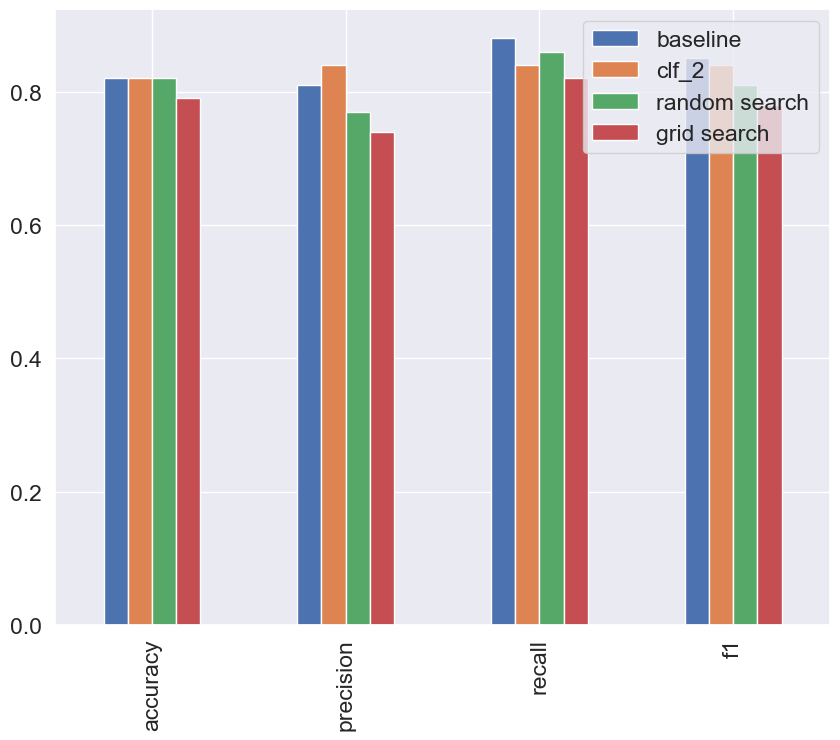

In [ ]:
compare_metrics = pd.DataFrame({'baseline': baseline_metrics,
                                'clf_2': clf_2_metrics,
                                'random search': rs_metrics,
                                'grid search': gs_metrics})

compare_metrics.plot.bar(figsize=(10, 8))

## Saving and loading trained machine learning model

Two ways to save and load machie learning models
1. With Pythin's 'pickel' module
2. With the 'joblib' module

## pickle

In [ ]:
import pickle

# Save an existing model to file 
pickle.dump(gs_clf, open('gs_random_forest_model_1.pkl', 'wb'))

In [ ]:


# Load a saved model
loaded_pickel_model = pickle.load(open('gs_random_forest_model_1.pkl', 'rb'))

In [ ]:
# Make some predictions
pickle_y_preds = loaded_pickel_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 78.69%
Precision: 74.19%
Recall: 82.14%
F1 : 77.97%


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

## joblib 

In [ ]:
from joblib import dump, load

# Save model to file 
dump(gs_clf, filename='gs_random_forest_model_1.joblib')


['gs_random_forest_model_1.joblib']

In [ ]:
# Import a saved joblib model 
loaded_job_model = load(filename='gs_random_forest_model_1.joblib')

In [ ]:
# Make and evaluate joblib predictions
joblib_y_preds = loaded_job_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 78.69%
Precision: 74.19%
Recall: 82.14%
F1 : 77.97%


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

## 7. Putting it all together!

In [22]:
data = pd.read_csv('car-sales-missing-data.csv')
data

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


In [23]:
data.dtypes

Make         object
Colour       object
Odometer    float64
Doors       float64
Price        object
dtype: object

In [24]:
data.isna().sum()

Make        1
Colour      1
Odometer    4
Doors       1
Price       2
dtype: int64

Steps we want to do (all in one cell)

1. Fill missing data
2. Convert data to numbers
3. Built a model on the data

In [31]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# set up random seed
import numpy as np
np.random.seed(42)

# Import data ad drop rows with missing lables
data = pd.read_csv('car-sales-missing-data.csv')
data.dropna(subset=['Price'], inplace=True)

# Definr different features and transform pipeline
categorical_features = ['Make', 'Colour']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

door_feature = ['Doors']
door_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=4))
])

numeric_features = ['Odometer']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
    ('cat', categorical_transformer, categorical_features),
    ('door', door_transformer, door_feature),
    ('num', numeric_transformer, numeric_features)
    ])

# Creating a preprocessing and modelling pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', RandomForestRegressor())])

# Split the data
X = data.drop('Price', axis=1)
y = data['Price']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: '$4,000'